Numerical Algorithms: Methods for Computer Vision, Machine Learning, and Graphics

https://people.csail.mit.edu/jsolomon/share/book/numerical_book.pdf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import math

## Catastrophic Cancellation

Page 34

In [ ]:
def f(x):
  return ((np.exp(x) - 1) / x) - 1

In [ ]:
x = np.linspace(-1e-8, +1e-8, 100)
y = f(x)

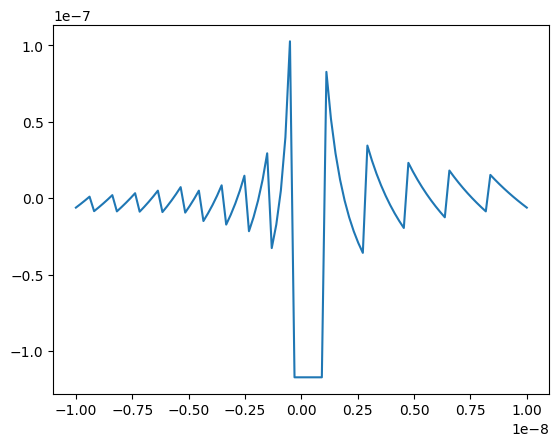

In [ ]:
plt.plot(x, y)

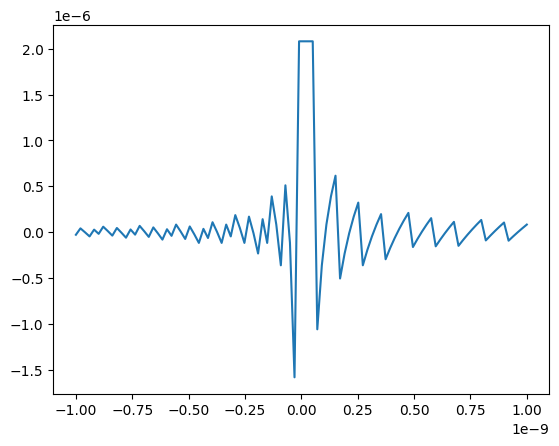

In [ ]:
x = np.linspace(-1e-9, +1e-9, 100)
y = f(x)
plt.plot(x, y)

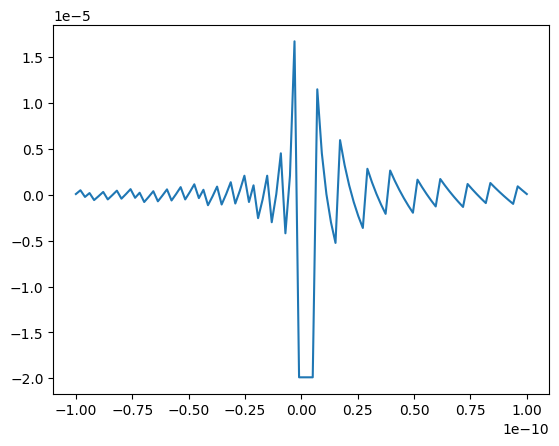

In [ ]:
x = np.linspace(-1e-10, +1e-10, 100)
y = f(x)
plt.plot(x, y)

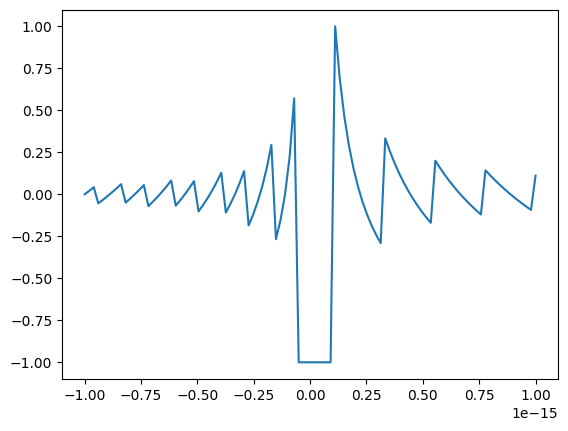

In [ ]:
x = np.linspace(-1e-15, +1e-15, 100)
y = f(x)
plt.plot(x, y)

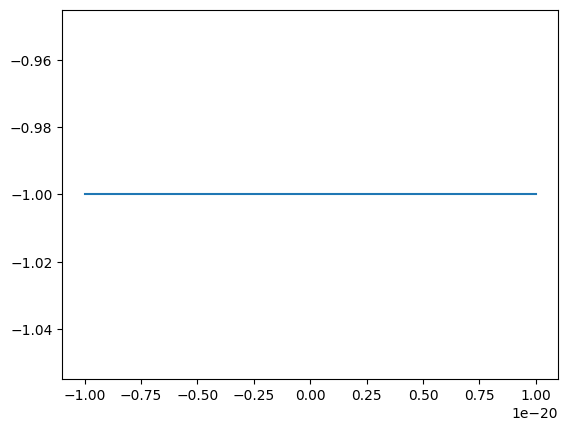

In [ ]:
x = np.linspace(-1e-20, +1e-20, 100)
y = f(x)
plt.plot(x, y)

## Kahan Summation

Pg 38

In [ ]:
def kahan_sum_my(xs):
  running_sum, correction = 0.0, 0.0
  for x in xs:
    # Let's assume x is a really really small number and we have no correction
    # right now:
    # correction = 0 ; x = 1e-38
    # So v will be very small = v = 1e-38
    v = x + correction
    # Let's assume running_sum is substantiallly larger (S) and `+ v` got
    # ignored:
    # running_sum = S ; sum_new = S
    sum_new = running_sum + v
    # sum_new - running_sum = 0 because of rounding error or floating point
    # precision loss
    # but v - (sum_new - running_sum) will get back the small value we wish to
    # recover, and then add that to new_correction, which will be added back in
    # L8.
    new_correction = v - (sum_new - running_sum)
    running_sum = sum_new
    correction = new_correction
  return running_sum

def kahan_sum_chat_gpt(arr):
    sum_ = 0.0
    c = 0.0  # Compensation for lost low-order bits
    for num in arr:
        y = num - c      # So far, so good: c is zero.
        t = sum_ + y     # Alas, sum_ is big, y small, so low-order digits of y are lost.
        c = (t - sum_) - y  # (t - sum_) recovers the high-order part of y; subtracting y recovers -(low part of y)
        sum_ = t         # Algebraically, c should always be zero. Beware overly-aggressive optimizing compilers!
    return sum_

In [ ]:
# A badly conditioned sum, condition number ~2.188e+14
# https://github.com/numpy/numpy/issues/8786#issuecomment-1959907256

p = [
    -0.41253261766461263,
    41287272281118.43,
    -1.4727977348624173e-14,
    5670.3302557520055,
    2.119245229045646e-11,
    -0.003679264134906428,
    -6.892634568678797e-14,
    -0.0006984744181630712,
    -4054136.048352595,
    -1003.101760720037,
    -1.4436349910427172e-17,
    -41287268231649.57,
]

exact = -0.377392919181026

# Should sum out to 0.
pp = p + [-1 * exact]

In [ ]:
print(math.fsum(pp))
print(sum(pp))
print(np.sum(pp))
print(kahan_sum_chat_gpt(pp))
print(kahan_sum_my(pp))

2.1415705725769235e-18
0.002392919181026021
-0.005419580818973979
-0.005419580818973979
-0.005419580818973979


In [ ]:
print(math.fsum(p))
print(sum(p))
print(np.sum(p))
print(kahan_sum_chat_gpt(p))
print(kahan_sum_my(p))

-0.377392919181026
-0.375
-0.3828125
-0.3828125
-0.3828125


In [ ]:
np.random.seed(1337)
small_numbers = np.exp(np.random.uniform(-11, -17, size=(10,)))
big_number = 41287272281118.43
list_numbers = np.array([big_number] + small_numbers.tolist() + [-1 * big_number])

print(list_numbers)
print(f'math fsum: {math.fsum(list_numbers)}')
print(f'np sum: {np.sum(list_numbers)}')
print(f'kahan_sum_my: {kahan_sum_my(list_numbers)}')
print(f'kahan_sum_chat_gpt: {kahan_sum_chat_gpt(list_numbers)}')

[ 4.12872723e+13  3.46725255e-06  6.44565799e-06  3.14794998e-06
  1.06142170e-06  2.43393019e-06  7.44645982e-07  3.46895364e-06
  4.77870235e-08  2.05691715e-07  8.36340130e-06 -4.12872723e+13]
math fsum: 2.938669207657296e-05
np sum: 0.0
kahan_sum_my: 0.0
kahan_sum_chat_gpt: 0.0
